In [24]:
import numpy as np
import pandas as pd
import seaborn as sns

In [25]:
df = pd.read_csv( "dataset.csv" )
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
df = df.rename( columns={
    "race/ethnicity": "race" , 
    "parental level of education": "parent_edu" , 
    "test preparation course": "course_completed" , 
    "math score": "score_math" , 
    "reading score": "score_reading" , 
    "writing score": "score_writing"
} )
df.head()

,gender,race,parent_edu,lunch,course_completed,score_math,score_reading,score_writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [27]:
df.dtypes

gender              object
race                object
parent_edu          object
lunch               object
course_completed    object
score_math           int64
score_reading        int64
score_writing        int64
dtype: object

In [28]:
df.isna().sum()

gender              0
race                0
parent_edu          0
lunch               0
course_completed    0
score_math          0
score_reading       0
score_writing       0
dtype: int64

<Axes: ylabel='score_math'>

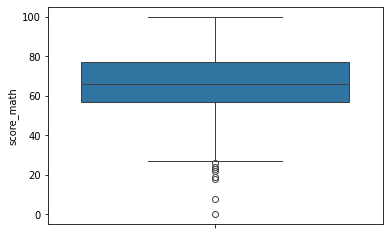

In [29]:
sns.boxplot(df.score_math)

<Axes: ylabel='score_reading'>

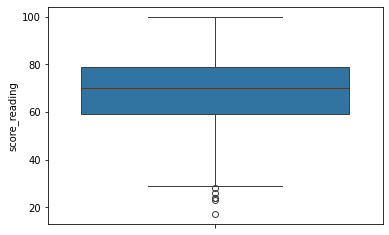

In [30]:
sns.boxplot(df.score_reading)

<Axes: ylabel='score_writing'>

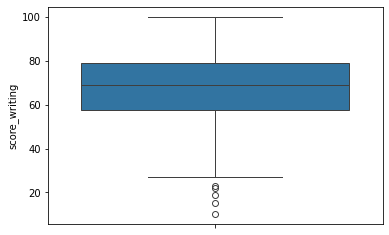

In [31]:
sns.boxplot(df.score_writing)

In [32]:
#Removing outliers with IQR Rule
def remove_outliers(feature):
    global df
    q3,q1 = np.percentile(ds[feature],[75,25])
    iqr=q3-q1
    df=df[(df[feature] >= q1-1.5*iqr) & (df[feature] <= q3+1.5*iqr)]
remove_outliers("score_writing")
remove_outliers("score_math")
remove_outliers("score_reading")

<Axes: ylabel='score_math'>

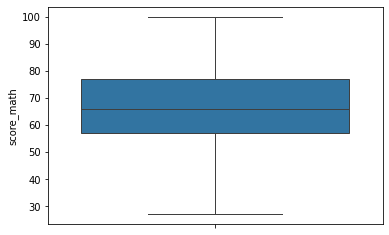

In [33]:
sns.boxplot(df.score_math)

<Axes: ylabel='score_reading'>

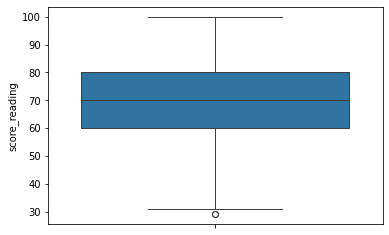

In [34]:
sns.boxplot(df.score_reading)

<Axes: ylabel='score_writing'>

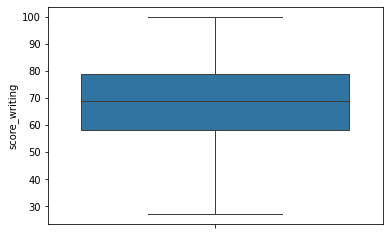

In [35]:
sns.boxplot(df.score_writing)

In [36]:
#normalising numeric features
def z_score(feature):
    df[feature] = (df[feature] - df[feature].mean()) / df[feature].std()
z_score("score_reading")
z_score("score_writing")
z_score("score_math")

In [37]:
df

,gender,race,parent_edu,lunch,course_completed,score_math,score_reading,score_writing
0,female,group B,bachelor's degree,standard,none,0.372985,0.168321,0.374052
1,female,group C,some college,standard,completed,0.164788,1.452498,1.337889
2,female,group B,master's degree,standard,none,1.622171,1.809214,1.682117
3,male,group A,associate's degree,free/reduced,none,-1.361994,-0.901827,-1.691315
4,male,group C,some college,standard,none,0.650582,0.596380,0.442897
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,1.483372,2.094586,1.819808
996,male,group C,high school,free/reduced,none,-0.321006,-1.044513,-0.934014
997,female,group C,high school,free/reduced,completed,-0.529204,0.096978,-0.245558
998,female,group D,some college,standard,completed,0.095389,0.596380,0.580588
